Vicente Isla Soto

In [23]:
# Pregunta 1: Extracción de acciones de Tesla con yfinance
import yfinance as yf
import pandas as pd

# Descargar datos de Tesla
tesla_data = yf.download('TSLA', start='2020-01-01', end='2022-12-31')
tesla_data.reset_index(inplace=True)
print(tesla_data.head())


[*********************100%***********************]  1 of 1 completed

Price        Date      Close       High        Low       Open     Volume
Ticker                  TSLA       TSLA       TSLA       TSLA       TSLA
0      2020-01-02  28.684000  28.713333  28.114000  28.299999  142981500
1      2020-01-03  29.534000  30.266666  29.128000  29.366667  266677500
2      2020-01-06  30.102667  30.104000  29.333332  29.364668  151995000
3      2020-01-07  31.270666  31.441999  30.224001  30.760000  268231500
4      2020-01-08  32.809334  33.232666  31.215334  31.580000  467164500


In [ ]:
# Pregunta 2: Webscraping de ingresos Tesla
import pandas as pd
import requests

# URL de los ingresos de Tesla
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'

# Encabezado para simular un navegador real y evitar bloqueos
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36'
}

try:
    # Obtener contenido de la página
    response = requests.get(url, headers=headers)
    response.raise_for_status()  # Lanza error si el status code es 4xx o 5xx

    # Extraer todas las tablas del HTML
    tables = pd.read_html(response.text)

    # Usar la primera tabla (la que contiene los ingresos)
    tesla_revenue = tables[0]
    tesla_revenue.columns = tesla_revenue.columns.str.strip()  # Limpiar nombres de columnas

    # Mostrar las últimas 5 filas
    print("Last five rows of Tesla's revenue data:")
    print(tesla_revenue.tail())

except requests.exceptions.RequestException as e:
    print(f"An error occurred: {e}")
except ValueError as e:
    print(f"Could not parse HTML table: {e}")


Last five rows of Tesla's revenue data:
    Tesla Annual Revenue (Millions of US $)  \
11                                     2013   
12                                     2012   
13                                     2011   
14                                     2010   
15                                     2009   

   Tesla Annual Revenue (Millions of US $).1  
11                                    $2,013  
12                                      $413  
13                                      $204  
14                                      $117  
15                                      $112  


/var/folders/c3/7k87pzn11s75g55xbwgq04900000gn/T/ipykernel_16462/548016446.py:18: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(response.text)


In [26]:
# Pregunta 3: Extracción de acciones de GameStop con yfinance
gme_data = yf.download('GME', start='2020-01-01', end='2022-12-31')
gme_data.reset_index(inplace=True)
print(gme_data.head())

[*********************100%***********************]  1 of 1 completed

Price        Date   Close    High     Low    Open    Volume
Ticker                GME     GME     GME     GME       GME
0      2020-01-02  1.5775  1.6175  1.5175  1.5350  17814400
1      2020-01-03  1.4700  1.5625  1.4600  1.5525  14175600
2      2020-01-06  1.4625  1.4775  1.4000  1.4500  13579200
3      2020-01-07  1.3800  1.4575  1.3600  1.4425  20912000
4      2020-01-08  1.4300  1.4625  1.3525  1.3725  22517600


In [ ]:
# Pregunta 4: Webscraping de ingresos GameStop
import pandas as pd
import requests

# URL de ingresos de GameStop
url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'

# Encabezado para evitar bloqueos del sitio
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36'
}

try:
    # Obtener la respuesta de la página
    response = requests.get(url, headers=headers)
    response.raise_for_status()

    # Leer las tablas del HTML
    tables = pd.read_html(response.text)

    # Usar la primera tabla
    gme_revenue = tables[0]
    gme_revenue.columns = gme_revenue.columns.str.strip()

    # Mostrar las últimas 5 filas
    print("Last five rows of GameStop's revenue data:")
    print(gme_revenue.tail())

except requests.exceptions.RequestException as e:
    print(f"An error occurred: {e}")
except ValueError as e:
    print(f"Could not parse HTML table: {e}")


Last five rows of GameStop's revenue data:
    GameStop Annual Revenue (Millions of US $)  \
12                                        2013   
13                                        2012   
14                                        2011   
15                                        2010   
16                                        2009   

   GameStop Annual Revenue (Millions of US $).1  
12                                       $8,887  
13                                       $9,551  
14                                       $9,474  
15                                       $9,078  
16                                       $8,806  


/var/folders/c3/7k87pzn11s75g55xbwgq04900000gn/T/ipykernel_16462/2039133610.py:18: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(response.text)


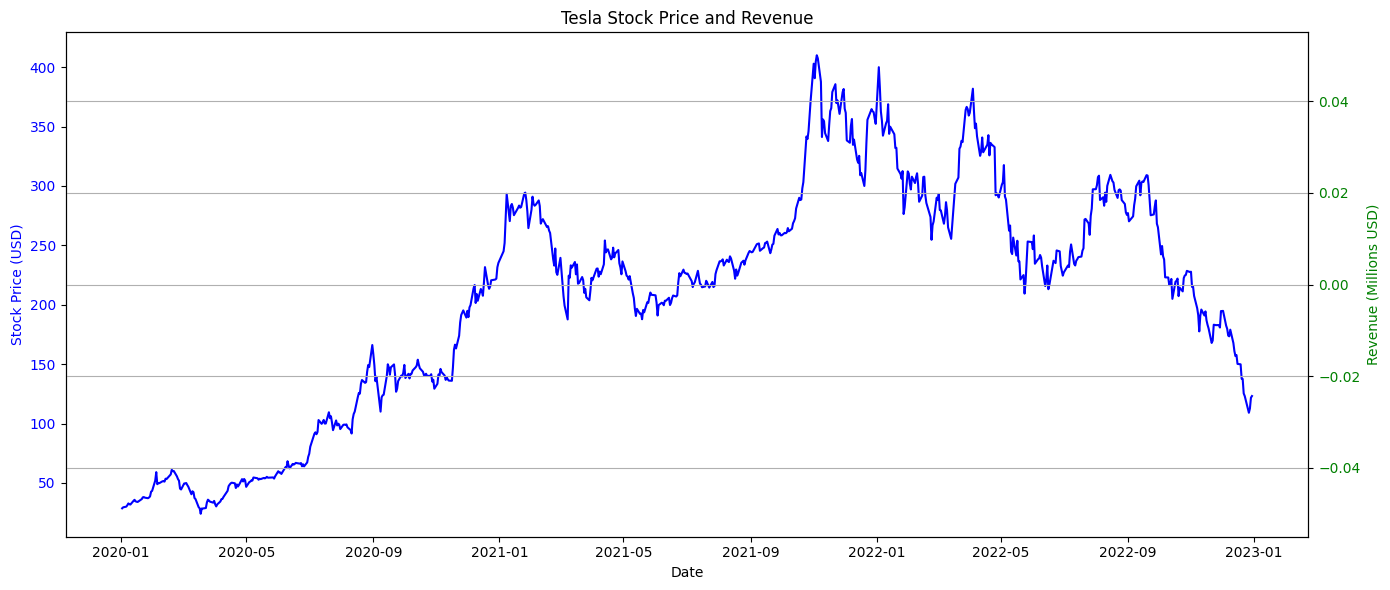

In [ ]:
# Pregunta 5: Gráfico de acciones e ingresos Tesla
import pandas as pd
import matplotlib.pyplot as plt

# Normalizar nombres y formatos
tesla_revenue.columns = ['Date', 'Revenue']
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])
tesla_revenue['Revenue'] = pd.to_numeric(
    tesla_revenue['Revenue'].replace(r'[\$,]', '', regex=True),
    errors='coerce'
)
tesla_revenue.dropna(inplace=True)

tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])

tesla_data = tesla_data[tesla_data['Date'] >= '2020-01-01']
tesla_revenue = tesla_revenue[tesla_revenue['Date'] >= '2020-01-01']

# Función de gráfico
def make_graph(stock_data, revenue_data, stock_name):
    fig, ax1 = plt.subplots(figsize=(14, 6))

    ax1.plot(stock_data['Date'], stock_data['Close'], 'b-', label="Stock Price")
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price (USD)', color='b')
    ax1.tick_params(axis='y', labelcolor='b')
    ax1.set_title(f"{stock_name} Stock Price and Revenue")

    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], 'g--', label="Revenue")
    ax2.set_ylabel('Revenue (Millions USD)', color='g')
    ax2.tick_params(axis='y', labelcolor='g')

    fig.tight_layout()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Ejecutar para Tesla
make_graph(tesla_data, tesla_revenue, "Tesla")


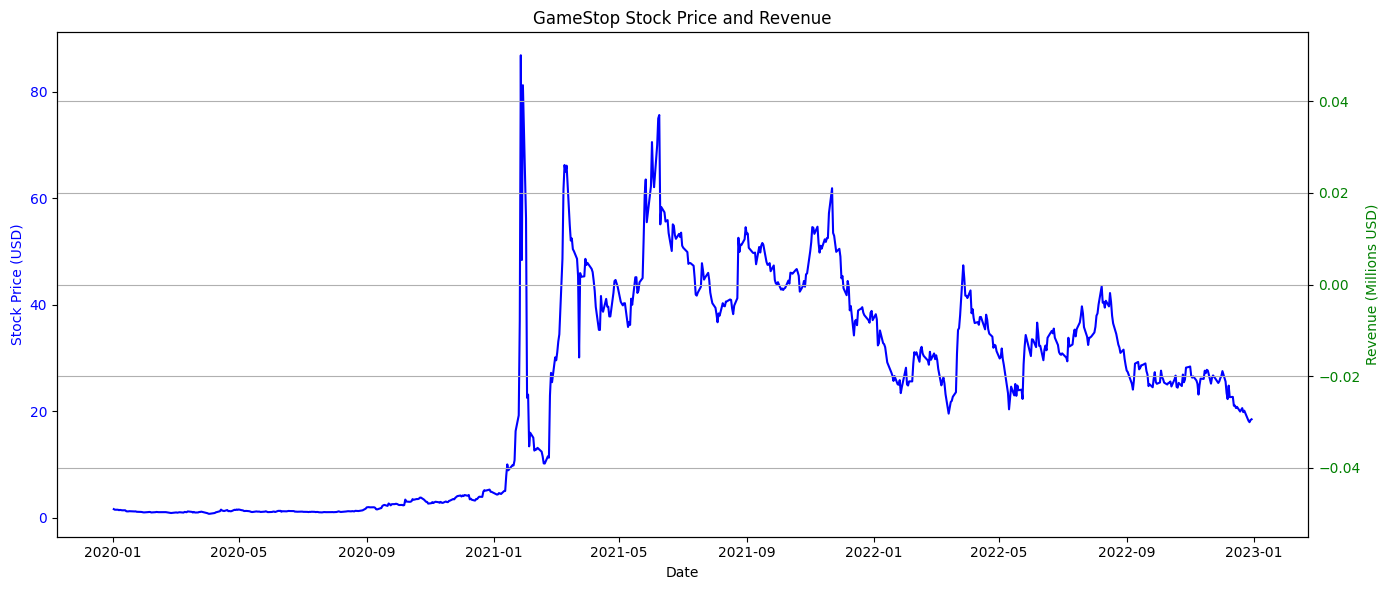

In [29]:
# Pregunta 6: Gráfico de acciones e ingresos GameStop
gme_data['Date'] = pd.to_datetime(gme_data['Date'])
gme_data = gme_data[gme_data['Date'] >= '2020-01-01']
gme_revenue = gme_revenue[gme_revenue['Date'] >= '2020-01-01']

make_graph(gme_data, gme_revenue, "GameStop")